## Google Colab preparations

In [ ]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

IN_MAIN = __name__ == '__main__'

In [ ]:
#Infrastructure for copying notebooks
if IN_COLAB and IN_MAIN:
    home_dir = '/content/drive/MyDrive/Colab Notebooks/Ecosystems/v3'
if IN_COLAB and IN_MAIN:
    from google.colab import drive
    drive.mount('/content/drive')
    import sys
    sys.path.append(home_dir)
    %cd $home_dir
    
!pip -q install import-ipynb

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Ecosystems/v3


# Preliminary imports

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import import_ipynb
import mothenv

from mothenv import MothEnv
from utility import normalize, distance, draw_objects, motion_diagram
from perception import Perception
from animal_classes import Terrain, SimpleSheep, Ecosystem, MultiSheep

importing Jupyter notebook from mothenv.ipynb
importing Jupyter notebook from utility.ipynb
importing Jupyter notebook from animal_classes.ipynb
importing Jupyter notebook from perception.ipynb


# Perception

In [ ]:
p = Perception()

## Perception overview

* Internal signals 
    * Interoception (Measured in SI units). Examples: glucose concentration, water concentration, body temp, pulse.
    * Proprioception (Measured as Booleans). Examples: leg_extended, arm_flexed, last_action_forward
* External signals (from the 5+ senses)
    * Raw perception (Measured in SI units). Examples: air temp, ground humidity, water salinity, brightness, colors, sound waves.
    * Object perception (Measured as a list of relative positions for each object type).
Example: wolves at [(2,4), (5,8)].
   
We will use two kinds of object perception:
* Single-object perception. Focus on the closest object within the perception radius.  We will define functions that return the perception intensity and the direction for this object.
* Multi-object perception. Focus on all objects within the perception radius. We will define functions that return the (aggregated) intensity and the (main) direction for these objects.

## Help functions

In [ ]:
objects=mothenv.generate_objects(side=mothenv.SIDE, n_objects=mothenv.N_OBJECTS)
objects

array([[ 1.6830318 ,  0.95997972],
       [-1.91703405,  6.61360553],
       [-1.54771342,  4.19201563],
       [-4.69357484, -8.80490468],
       [-5.95707315,  7.64165601],
       [ 0.95339816,  5.99020817],
       [ 5.6930671 , -7.72889014],
       [ 7.51701781,  8.57138445],
       [ 0.29417037,  0.70321923],
       [ 7.55942251, -9.71650645]])

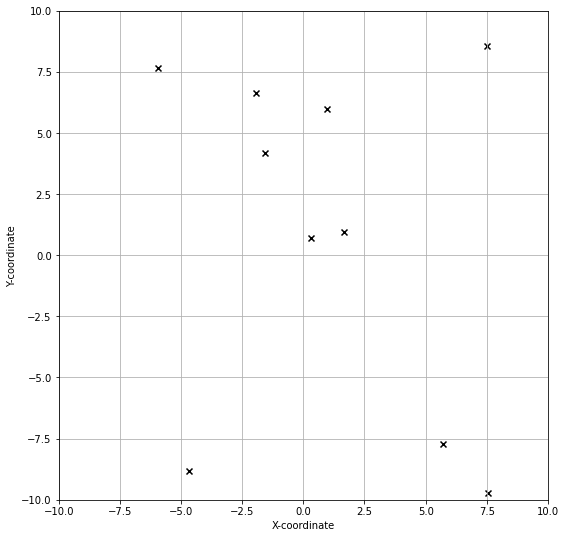

In [ ]:
draw_objects(objects);
#plt.title('Objects');

In [ ]:
# # Filters out the visible objects from position.

# def visible(position,objects,radius = mothenv.RADIUS): 
#     return np.array([x for x in objects if distance(position,x) < radius])
#     # return objects[distance(position, objects) < radius] #Faster!

p.visible(mothenv.ORIGIN,objects)

array([[1.6830318 , 0.95997972],
       [0.29417037, 0.70321923]])

In [ ]:
# # This function returns the closest point to position in objects or the empty array

# def closest(position,objects,radius = mothenv.RADIUS): 
#     vis = visible(position,objects,radius)
#     if vis.shape[0] == 0: return np.array([]) # Return an empty array if no objects are in sight
#     index = np.argmin(distance(position,vis))
#     return vis[index].reshape(1,2)
     
# closest(mothenv.ORIGIN,objects)#.shape == (0,)

In [ ]:
# Computes the direction to the closest point from position among objects within the radius
# Returns the 0-vector if there are no such objects

# def closest_direction(position, objects):
#     c = closest(position, objects)
#     if c.shape == (0,):
#         return mothenv.ORIGIN#.reshape(1,2) 
#     else:
#         return  normalize(c - position).reshape(-1)

# closest_direction(mothenv.ORIGIN,objects)

## Object perception

In [ ]:
#Inverse square law

# The stimulus caused by one object at distance d.
# The closer the object the smaller the distance and the bigger the stimulus
# There is a max stimulus (max firing) that one object can cause. We set it to 1.

# def stimulus(d,radius=mothenv.RADIUS): 
#     epsilon = 1#e-1
#     v=1/(epsilon+d)**2
#     v[d>radius]=0
#     v[v>1]=1
#     return v

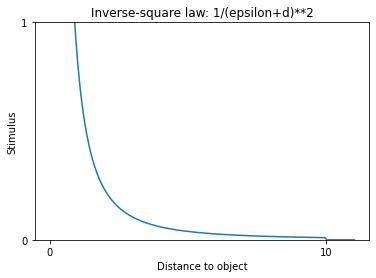

In [ ]:
#Inverse square law Stimulus plot

x = np.linspace(0,mothenv.RADIUS*1.1,num=200) 
y = p.stimulus(x,mothenv.RADIUS)
plt.plot(x, y)
plt.xlabel("Distance to object")
plt.ylabel("Stimulus")
plt.xticks([0,mothenv.RADIUS])
plt.yticks([0,1])
plt.ylim([0,1])
#plt.ylim([0,19.01])
plt.title('Inverse-square law: 1/(epsilon+d)**2');

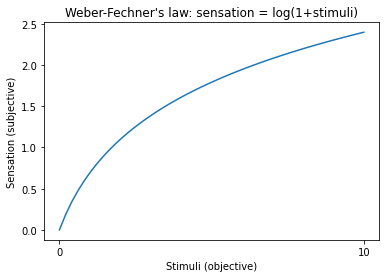

In [ ]:
# Weber-Fechner's law

# def weber(stimuli): 
#     return np.log(1+stimuli)#/np.log(1+max_stimuli)

x = np.linspace(0,10) 
y = p.weber(x)
plt.plot(x, y)
plt.xlabel("Stimuli (objective)")
plt.ylabel("Sensation (subjective)")
plt.xticks([0,10])
#plt.yticks([0,1])
plt.title("Weber-Fechner's law: sensation = log(1+stimuli)");

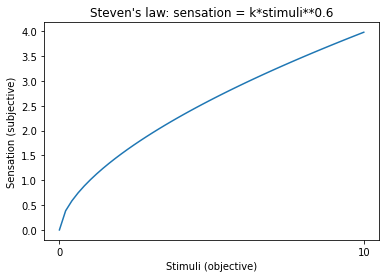

In [ ]:
# Steven's law

# def steven(stimuli,exponent=0.6): # The exponent for smell in humans is 0.6
#     return stimuli**exponent#/max_stimuli**exponent

x = np.linspace(0,10) 
y = p.steven(x)
plt.plot(x, y)
plt.xlabel("Stimuli (objective)")
plt.ylabel("Sensation (subjective)")
plt.xticks([0,10])
#plt.yticks([0,1])
plt.title("Steven's law: sensation = k*stimuli**0.6");

In [ ]:
 # The sensation of the aggregated stimuli from objects inside the radius.

# def sensation(objects, position=mothenv.ORIGIN, radius=mothenv.RADIUS):
#     total=stimuli(distance(position,objects)) # stimuli(distances,radius)
#     return weber(total)
#     #return steven(total)
#     #return total

p.sensation(objects)

array([0.95005187])

In [ ]:
# Computes the main direction to the objects within the radius, i.e. the sum of the perception vectors.
# Possible input to the policy network

# def multi_direction(position,objects, radius=None):
#     signals = stimulus(distance(position,objects), radius=radius).reshape(-1,1)
#     vector_sum = (signals*normalize(objects - position)).sum(axis=0,keepdims=True) #ta inte bort dim 1x2
#     return normalize(vector_sum).reshape(-1) #platta ut!

p.multi_direction(mothenv.ORIGIN, objects)

array([0.47203569, 0.88157944])

In [ ]:
#Total smell from all objects
# def total_intensity(position, objects):
#     if objects.size == 0:
#         return np.array([0.0])
#     return sensation(distance(position,objects))

# #Total smell from the closest object (disregarding all others)
# def nearest_intensity(position, objects):
#     closest_point=closest(position,objects)
#     return total_intensity(position, closest_point)

p.total_intensity(mothenv.ORIGIN, objects),\
p.nearest_intensity(mothenv.ORIGIN, objects)

(array([0.61225382]), array([0.54268011]))

# Plots

## Intensity plots

In [ ]:
def intensity_diagram(objects,multi=True,side=10,granularity=100):

    X = np.linspace(-side, side, granularity)
    X, Y = np.meshgrid(X, X)
    Z = []
    for position in zip(X.flatten(), Y.flatten()):
        if multi:
            mv = p.total_intensity(position, objects)
        else:
            mv = p.nearest_intensity(position, objects)
        Z.append(mv.item())
    Z = np.array(Z, ).reshape(X.shape)

    fig, ax = draw_objects(objects)
    ax.contourf(X, Y, Z, levels=100, cmap='Blues') #Reds, Purples, Greys
    plt.scatter(objects[:,0],objects[:,1], marker='x', c='Red')

    # Select color
    #https://www.kite.com/python/docs/matplotlib.pyplot.colormaps
    #Purples	white to dark purple
    #RdPu	white, pink, dark purple
    #Reds	white to dark red
    #rainbow
    #Greys

    plt.title('Heat map. The darker the more perception intensity.');

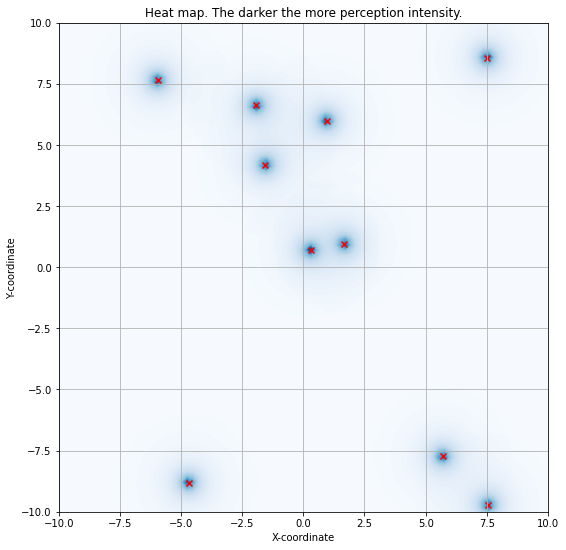

In [ ]:
intensity_diagram(objects,multi=True)

## Direction plots

In [ ]:
def quiver_diagram(objects,multi=True,granularity=20):

    X = np.linspace(-mothenv.SIDE/2, mothenv.SIDE/2, granularity)
    X, Y = np.meshgrid(X, X)
    u = []
    v = []
    for  position in zip(X.flatten(), Y.flatten()):
        if multi:
            mv = p.multi_direction(position,objects)
        else:
            mv = p.closest_direction(position,objects)        
        u.append(mv[0])
        v.append(mv[1])

    u = np.array(u)
    v = np.array(v)

    n = -2
    color_array = np.sqrt(((v-n)/2)**2 + ((u-n)/2)**2) #störst när båda är negativa. DIagonalt motsatt minst
    #Färga efter vinkel?

    fig, ax = draw_objects(objects)
    ax.quiver(X,Y,u,v, color_array, alpha=0.8, angles='xy')
    plt.title("Quiver diagram. Arrows point in gradient direction.");

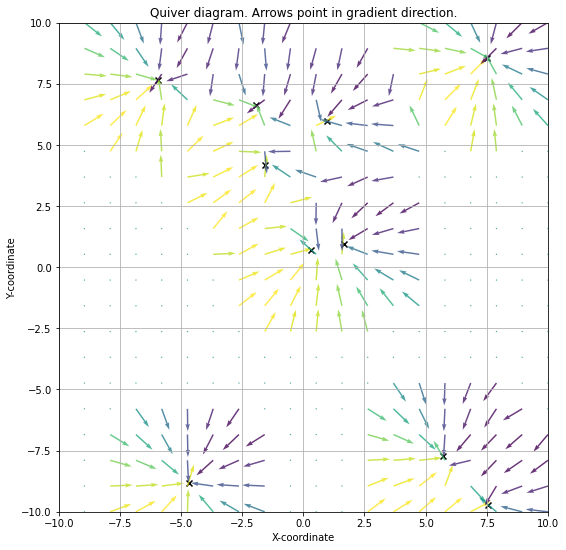

In [ ]:
quiver_diagram(objects,multi=True)

In [ ]:
def generate_trace(objects, trace_length, delta=mothenv.DELTA, eps=0, attraction=True):

    pos = mothenv.ORIGIN # Bryt ut detta. Input: env + antal steg + start
    trace = [pos]
    for _ in range(trace_length):
        noise = eps * (np.random.rand(2) - 0.5)
        new_direction = p.multi_direction(pos, objects) + noise
        if attraction:
            pos = pos + delta * new_direction
        else:
            pos = pos - delta * new_direction
        trace.append(pos)
    trace = np.array(trace)
    return trace

generate_trace(objects,trace_length=1000)

array([[0.        , 0.        ],
       [0.00472036, 0.00881579],
       [0.00942332, 0.01764088],
       ...,
       [0.29787409, 0.70338286],
       [0.28788329, 0.70295402],
       [0.29787385, 0.70338849]])

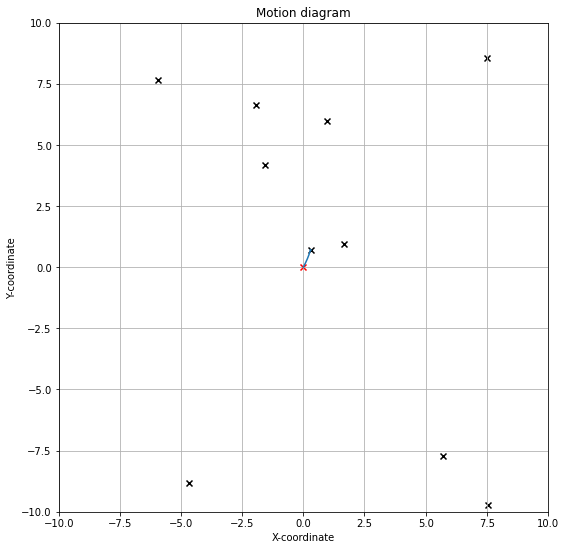

In [ ]:
trace=generate_trace(objects,trace_length=1000)
motion_diagram(objects,trace)

In [ ]:
# FFwriter = animation.FFMpegWriter(fps=60)
# anim.save('animation.mp4', writer = FFwriter)